In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout, Lambda
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

/Users/Xitiz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/Xitiz/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [1]:
import sys
sys.executable

'/Users/Xitiz/anaconda3/envs/tensorflow/bin/python'

In [2]:
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_dir = 'dataset/dogscats/train/'
validation_dir = 'dataset/dogscats/valid/'
test_dir = 'dataset/dogscats/test1/'

image_w = 128
image_h = 128

In [4]:
train_generator = datagen.flow_from_directory(train_dir,
                                             target_size= (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'binary')

Found 23000 images belonging to 2 classes.


In [5]:
validation_generator = datagen.flow_from_directory(validation_dir,
                                                  target_size = (image_w, image_h),
                                                  batch_size = 32,
                                                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [6]:
def LeNet(width, height, channels, output):
    model = Sequential()
        
    #Convolution
    model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), input_shape=(width, height, channels)))
    
    #ReLU
    model.add(Activation('relu'))
    
    #Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    # Convolution
    model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(2,2)))
    
    #ReLU
    model.add(Activation('relu'))
    
    # Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(100))
    
    model.add(Activation('relu'))
    
    model.add(Dense(output))
    
    return model


In [7]:
EPOCH = 3
train_samples = 23000
validation_samples = 2000
batch_size = 32

In [8]:
model = LeNet(image_w, image_h, 3, 1)

model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [9]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = train_samples // batch_size,
                    epochs = EPOCH,
                    validation_data = validation_generator,
                    validation_steps = validation_samples // batch_size)
                    

Epoch 1/3
718/718 [==============================] - 404s 563ms/step - loss: 0.2244 - acc: 0.6360 - val_loss: 0.2020 - val_acc: 0.7102
Epoch 2/3
718/718 [==============================] - 267s 372ms/step - loss: 0.1819 - acc: 0.7338 - val_loss: 0.1738 - val_acc: 0.7611
Epoch 3/3
718/718 [==============================] - 255s 354ms/step - loss: 0.1631 - acc: 0.7695 - val_loss: 0.1621 - val_acc: 0.7661


In [10]:
ls

CAT-DOG.ipynb  dataset/       deep_learning/ kmeans/        models/


In [11]:
model_save_dir = 'models/'
model_save_path = model_save_dir+'cat_dog_cnn.h5'

In [12]:
if not os.path.isdir(model_save_dir):
    os.mkdir(model_save_dir)

In [13]:
ls

CAT-DOG.ipynb  dataset/       deep_learning/ kmeans/        models/


In [14]:
model.save_weights(model_save_path)

In [15]:
history.history

{'acc': [0.6359717868130949, 0.7337600139324277, 0.7695053988157436],
 'loss': [0.2244229236107095, 0.18186828472272978, 0.16315955523620787],
 'val_acc': [0.7101814516129032, 0.7610887096774194, 0.7661290322580645],
 'val_loss': [0.20204921715682553, 0.17377442073437474, 0.16207102049262292]}

In [16]:
model.load_weights(model_save_path)

In [17]:
img = load_img('dataset/dogscats/train/cats/cat.110.jpg', target_size=(128, 128))

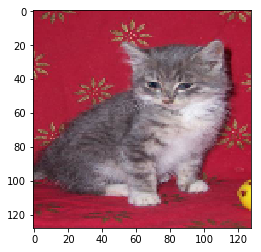

In [18]:
plt.imshow(img)
plt.show()

In [19]:
img = np.array(img)/255.

img = np.expand_dims(img, axis=0)

In [20]:
model.predict(img)

array([[0.12734827]], dtype=float32)

In [21]:
img = load_img('dataset/dogscats/train/dogs/dog.0.jpg', target_size=(128, 128))

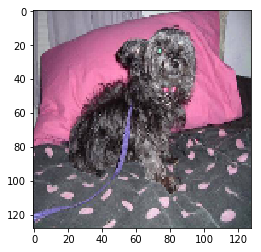

In [22]:
plt.imshow(img)
plt.show()

In [23]:
img = np.array(img)/255.

img = np.expand_dims(img, axis=0)

In [24]:
model.predict(img)

array([[0.70245105]], dtype=float32)